In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle as pkl
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import json

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [3]:
#ans_dict = {28: {k:[] for k in range(5)}, 56: {k:[] for k in range(5)}}
with open("/home/alex/TP/hse_data/coeffs.pkl", "rb") as f:
    ans_dict = pkl.load(f)
ans_dict[84] = {k: [] for k in range(5)}

In [60]:
ans_dict

{28: {0: [4.754947, 2.6319282, -0.14074588],
  1: [4.707027, 2.660154, -0.118589066],
  2: [4.4045386, 2.6664014, -0.07771805],
  3: [4.0849156, 2.6657608, -0.04028634],
  4: [3.9873078, 2.6952834, -0.019603243]},
 56: {0: [41.35423, 3.312253, -1.1305538],
  1: [38.78567, 3.306698, -1.084878],
  2: [41.09389, 3.3482416, -1.0859306],
  3: [35.007362, 3.336918, -0.97272515],
  4: [28.950443, 3.3395483, -0.82753813]},
 84: {0: [182.43275, 3.6725721, -1.9185368],
  1: [176.7338, 3.7043388, -1.8420062],
  2: [169.21957, 3.7456899, -1.7483298],
  3: [155.20262, 3.7832186, -1.6305416],
  4: [127.25339, 3.8102508, -1.4429706]},
 'format': ['a', 'b', 'c']}

In [52]:
""" Aux functions """
def extract_an_vals(curr_dist, max_dist):
    #path_an = "/home/alex/Downloads/refwdpdfofintensityatshorterz/"
    #path_an = "/home/abuzovkin/py_atm/scripts/an_data"
    path_an = "/home/alex/TP/octave_an/data/old/an_data"
    curr_file = [f for f in os.listdir(path_an) if \
                 f.find(str(int(curr_dist)))!=-1][0]
    with open(os.path.join(path_an, curr_file), "r") as f:
        data = f.readlines()[1:]
    data = [[float(m) for m in s.strip().split(" ")] for s in data if len(s) > 0]

    if np.max([n[0] for n in data]) < max_dist:
        data.append([max_dist + 1, 1e-10])
    interCurve = interp1d([n[0] for n in data], [n[1] for n in data], kind="linear")
    return interCurve

def take_half(curr_dist):
    # path to analytical curves
    #path_an = "/home/alex/Downloads/refwdpdfofintensityatshorterz/"
    path_an = "/home/alex/TP/octave_an/data/old/an_data"
    curr_file = [f for f in os.listdir(path_an) if \
                 f.find(str(int(curr_dist)))!=-1][0]
    with open(os.path.join(path_an, curr_file), "r") as f:
        data = f.readlines()[1:]
    data = np.stack([np.array([float(m) for m in s.strip().split(" ")]) \
            for s in data if len(s) > 0])

    # half-width
    data = data[data[:,1] > 0.5 * data[0,1], 0][-1]
    return data

def bins_set(Iavg, numbins):
    binsize0 = Iavg * 1e-2
    lastedge = Iavg * 1e+3
    c = np.log(1 + lastedge / binsize0) / numbins
    binedges = (np.exp(c * np.arange(numbins + 1)) - 1) * binsize0
    binedges[-1] = Iavg * 1e+8
    return binedges

d_c = 84
half_curr = take_half(d_c) / 10. / 2.
func_inter = extract_an_vals(d_c, 3900 / 2 + 1)
Iavg = func_inter(half_curr)
print(Iavg)
binedges = bins_set(Iavg, 800)[1:-1]
x_curr = np.arange(0.000001 * Iavg, 50.1 * Iavg, 50.1 * Iavg / 10000)[1:]#binedges
#x_curr = (binedges[:-1] + binedges[1:]) / 2.

dist_current = 84
circle_current = 4
path0 = "/home/alex/TP/hse_data/storage_databig/datasets/"
xdata = np.load(path0 + "databig_"+str(dist_current)+"_"+str(circle_current)+".npy")
#data_28.0_0.npy")#databig_28_0.npy")

1.3403003622394526e-06


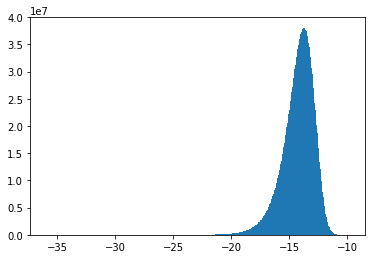

In [46]:
plt.hist(np.log(xdata), bins=500)
plt.show()

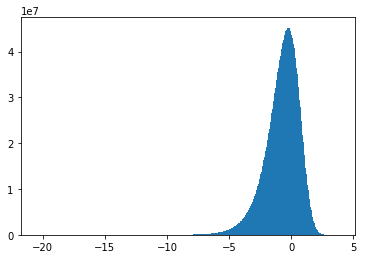

In [54]:
plt.hist(xdata, bins=500)
plt.show()

In [44]:
del xdata

In [53]:
def normalizing_hist(x, y):
    curr_sum = np.sum(y)
    return [x, y / curr_sum / (x[1:] - x[:-1])]

# hist from file
#xdata = np.load("/home/alex/TP/hse_data/databig_28_0.npy")#data_28.0_0.npy") #databig_28_0.npy")
#with open("/home/alex/TP/hse_data/bins.pkl", "rb") as f:
#    x_curr, Iavg = pkl.load(f)

x_curr = [x_curr / Iavg][:][0]
#y_, x_ = np.histogram(xdata / Iavg, bins=x_curr[:-1])
#print(y_)
#x_, y_ = normalizing_hist(x_, y_)
b_size_loc = 1000000
for i in range(int(len(xdata)/b_size_loc) + 1):
    xdata[i * b_size_loc: (i + 1) * b_size_loc] = \
            np.log(xdata[i * b_size_loc: (i + 1) * b_size_loc] / Iavg)

y_, x_ = np.histogram(xdata, bins=np.log(x_curr[:-1]))
x_, y_ = normalizing_hist(x_, y_)
x_ = np.concatenate([np.array([x_[0]]), [x_[1:][y_ > 0]][:][0]], 0)
y_ = [y_[y_ > 0]][:][0]

x_ = (x_[1:] + x_[:-1]) * 0.5
x_, y_ = np.exp(x_), np.exp(-x_) * y_
l_cut = 1
#plt.plot(np.exp(dlog[1]), np.exp(-dlog[1].ravel())*dlog[0])

0
0


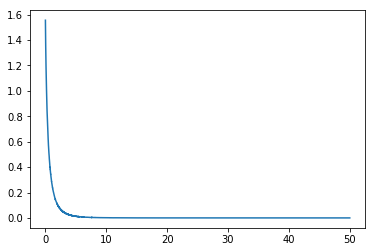

In [195]:
print(np.sum([y_[:7100] == 0]))
print(np.sum([y_ == 0]))
plt.plot(x_[:7100], y_[:7100])

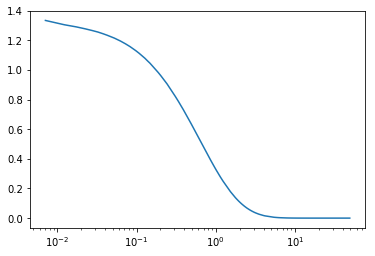

In [55]:
plt.plot(x_, y_)
plt.xscale("log")

In [208]:
""" Just write  """
pathtxt = "/home/alex/TP/hse_data/"
# write N data
with open(os.path.join(pathtxt, "pdf_36864.txt"), "w") as f:
    for k in range(len(x_)):
        f.write(str(x_[k]) + " " + str(y_[k]) + "\n")

In [286]:
# initially we find exp(-b*sqrt(I-c))
with open("/home/alex/TP/hse_data/hist_28_xy.pkl", "rb") as f:
    dict_xy = pkl.load(f)
x_, y_ = dict_xy["x"][:-1], dict_xy["y"][:-1]
l_cut = 1

In [120]:
# initially we find exp(-b*sqrt(I-c))
with open("/home/alex/TP/hse_data/hist_3p5_xy.pkl", "rb") as f:
    dict_xy = pkl.load(f)
x_, y_ = dict_xy["x"][:-1], dict_xy["y"][:-1]
l_cut = 22

In [56]:
tf.compat.v1.reset_default_graph()
tf.compat.v1.disable_eager_execution()

global_step = tf.Variable(0, trainable=False)
learning_rate = tf.compat.v1.train.exponential_decay(0.001, global_step, \
                                           100, 0.1, staircase=True)

src_x_ = tf.compat.v1.placeholder(dtype=tf.float32)#, shape=(len(x_) - l_cut, ))
src_y_ = tf.compat.v1.placeholder(dtype=tf.float32)#, shape=(len(x_) - l_cut, ))
a_ = tf.compat.v1.Variable(initial_value=np.random.uniform(0.01, 1.), dtype=tf.float32)
b_ = tf.compat.v1.Variable(initial_value=np.random.uniform(0.01, 1.), dtype=tf.float32)
c_ = tf.compat.v1.Variable(initial_value=0., dtype=tf.float32)
#np.random.uniform(0., x_[l_cut-2]), dtype=tf.float32)

def pdf_calc(x, a, b, c):
    return a * tf.exp(-b * tf.sqrt(tf.compat.v1.nn.relu(x - c)))

a_renorm = tf.compat.v1.assign(a_, tf.compat.v1.abs(a_))
b_renorm = tf.compat.v1.assign(b_, tf.compat.v1.abs(b_))
c_renorm = tf.compat.v1.assign(c_, tf.math.minimum(c_, np.min(x_[l_cut:])-0.00001))
#tf.compat.v1.assign(c_, tf.compat.v1.abs(c_))

loss = tf.compat.v1.reduce_mean(tf.compat.v1.square(src_x_ - tf.reduce_min(src_x_))*tf.compat.v1.square(\
                                        pdf_calc(src_x_, a_, b_, c_) - src_y_))
#loss = tf.compat.v1.reduce_mean(tf.compat.v1.square(tf.math.log(pdf_calc(src_x_, a_, b_, c_)+0.000000001) - \
#                                                    tf.math.log(src_y_)))
optimize_procedure = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

In [57]:
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    n_iter = 250000
    for k in range(n_iter):
        x_loc = [x_[y_ > 0]][:][0]
        y_loc = [y_[y_ > 0]][:][0]
        l, _ = sess.run([loss, optimize_procedure], feed_dict={src_x_: x_loc[l_cut:], src_y_: y_loc[l_cut:]})
        sess.run(c_renorm)
        if k % 100 == 0 or k < 100:
            ao, bo, co = sess.run([a_, b_, c_])
            print(k, l, ao, bo, co)

    ao, bo, co = sess.run([a_, b_, c_])
    ans_dict[dist_current][circle_current] = [[ao, bo, co]][:][0]
    print(k, l, ao, bo, co, x_[l_cut])
    print(1. / bo)

0 0.0079558175 0.15748304 0.86738855 -0.0009993763
1 0.007869922 0.1564836 0.8683879 -0.0019973358
2 0.0077858632 0.15548511 0.86938614 -0.0029926521
3 0.007703645 0.15448792 0.87038285 -0.0039841207
4 0.0076232716 0.15349244 0.8713776 -0.0049704914
5 0.007544746 0.15249902 0.87236995 -0.0059504723
6 0.0074680652 0.15150806 0.8733595 -0.006922731
7 0.0073932246 0.15051994 0.8743458 -0.0078858845
8 0.0073202206 0.14953503 0.8753284 -0.008838507
9 0.0072490424 0.1485537 0.87630695 -0.009779137
10 0.007179682 0.14757632 0.877281 -0.010706265
11 0.007112127 0.14660324 0.87825024 -0.011618355
12 0.0070463596 0.14563482 0.8792142 -0.012513835
13 0.0069823656 0.1446714 0.8801726 -0.0133911045
14 0.006920126 0.1437133 0.88112503 -0.0142485425
15 0.00685962 0.14276086 0.8820712 -0.015084507
16 0.0068008252 0.1418144 0.8830108 -0.015897345
17 0.006743717 0.14087419 0.8839435 -0.016685395
18 0.006688272 0.13994056 0.88486904 -0.017446995
19 0.0066344626 0.13901377 0.8857871 -0.01818049
20 0.00658

6600 0.0002657248 2.8284996 2.3842723 0.012262965
6700 0.00025504152 2.8713026 2.3937595 0.012262965
6800 0.00024491714 2.9138484 2.403103 0.012262965
6900 0.00023533164 2.9561203 2.4123032 0.012262965
7000 0.00022626572 2.9980996 2.4213598 0.012262965
7100 0.00021770051 3.0397682 2.4302726 0.012262965
7200 0.00020961752 3.0811076 2.439041 0.012262965
7300 0.00020199892 3.122097 2.4476645 0.012262965
7400 0.0001948274 3.162716 2.4561424 0.012262965
7500 0.00018808579 3.202943 2.464473 0.012262965
7600 0.00018175748 3.2427564 2.4726558 0.012262965
7700 0.00017582631 3.2821329 2.4806893 0.012262965
7800 0.00017027621 3.321049 2.4885724 0.012262965
7900 0.00016509168 3.3594804 2.4963021 0.012262965
8000 0.00016025733 3.3974023 2.503878 0.012262965
8100 0.00015575827 3.4347882 2.511297 0.012262965
8200 0.00015157969 3.471612 2.5185578 0.012262965
8300 0.00014770708 3.5078478 2.5256581 0.012262965
8400 0.00014412626 3.543467 2.532595 0.012262965
8500 0.0001408232 3.5784416 2.539366 0.012262

22800 2.342039e-05 12.18158 3.0626957 -0.41787142
22900 2.320373e-05 12.262773 3.065117 -0.42061222
23000 2.2990062e-05 12.344088 3.0675242 -0.42334104
23100 2.2779233e-05 12.425534 3.0699184 -0.42605928
23200 2.2571552e-05 12.507088 3.072388 -0.42884293
23300 2.236613e-05 12.588782 3.0746918 -0.4314838
23400 2.2163724e-05 12.670576 3.077023 -0.4341482
23500 2.1964019e-05 12.752502 3.079362 -0.43681946
23600 2.1766913e-05 12.83454 3.081683 -0.43947548
23700 2.1572434e-05 12.916692 3.083991 -0.4421203
23800 2.1380538e-05 12.998965 3.0863218 -0.44478723
23900 2.1191105e-05 13.081338 3.0885725 -0.4473807
24000 2.1004158e-05 13.163828 3.090842 -0.44999248
24100 2.0819618e-05 13.24643 3.0930924 -0.45258707
24200 2.0637473e-05 13.329137 3.0953374 -0.45517805
24300 2.0457672e-05 13.411952 3.0975711 -0.4577585
24400 2.0280191e-05 13.494864 3.0997705 -0.46030757
24500 2.010493e-05 13.577889 3.1019905 -0.4628771
24600 1.9931922e-05 13.661009 3.1041832 -0.46542177
24700 1.97612e-05 13.744232 3.10

39000 7.423763e-06 26.243338 3.3285751 -0.7433247
39100 7.3820916e-06 26.332966 3.3296685 -0.7447696
39200 7.3406873e-06 26.42256 3.3308277 -0.7462788
39300 7.299664e-06 26.5122 3.331977 -0.7477781
39400 7.2588837e-06 26.60182 3.3330562 -0.74920696
39500 7.2184657e-06 26.691456 3.334167 -0.7506673
39600 7.1783484e-06 26.7811 3.33527 -0.75211835
39700 7.138528e-06 26.870745 3.3363655 -0.75356185
39800 7.099022e-06 26.96039 3.337464 -0.75500846
39900 7.059805e-06 27.050058 3.338559 -0.75644994
40000 7.0209344e-06 27.139723 3.3396935 -0.7579307
40100 6.9822595e-06 27.229414 3.3407235 -0.7593071
40200 6.943913e-06 27.319113 3.3418107 -0.76073956
40300 6.9058487e-06 27.408825 3.3428926 -0.7621665
40400 6.8681843e-06 27.49854 3.343908 -0.7635266
40500 6.830579e-06 27.588266 3.3450332 -0.7649956
40600 6.793365e-06 27.67799 3.3460956 -0.76640147
40700 6.75644e-06 27.767736 3.3471885 -0.767837
40800 6.719733e-06 27.857512 3.3482108 -0.7692022
40900 6.683334e-06 27.947262 3.349271 -0.77060413
41

55400 3.3123754e-06 40.92656 3.4716444 -0.9372771
55500 3.297712e-06 41.01512 3.4723835 -0.93828666
55600 3.283315e-06 41.103683 3.473053 -0.9392267
55700 3.2689936e-06 41.1922 3.4737375 -0.94018155
55800 3.2547553e-06 41.280735 3.4744065 -0.94112015
55900 3.2405821e-06 41.369236 3.4750857 -0.9420683
56000 3.2264934e-06 41.457756 3.4757602 -0.943012
56100 3.2124876e-06 41.54626 3.4764392 -0.9439596
56200 3.1985999e-06 41.634754 3.4771426 -0.9449308
56300 3.1846614e-06 41.723217 3.477762 -0.94581825
56400 3.1708735e-06 41.81166 3.478427 -0.9467504
56500 3.157181e-06 41.90015 3.4791274 -0.9477176
56600 3.1435006e-06 41.98853 3.4797533 -0.9486096
56700 3.129914e-06 42.07703 3.4804146 -0.94953763
56800 3.1164234e-06 42.16536 3.4810681 -0.95045626
56900 3.1029883e-06 42.253788 3.4817262 -0.9513798
57000 3.089633e-06 42.342113 3.482381 -0.9522996
57100 3.0764058e-06 42.430424 3.4830694 -0.95325184
57200 3.0631707e-06 42.518696 3.4837155 -0.9541619
57300 3.0499975e-06 42.606956 3.4843373 -0.9

71800 1.7029328e-06 55.098682 3.5639157 -1.0687113
71900 1.6963136e-06 55.182247 3.5643322 -1.0693367
72000 1.6899152e-06 55.265854 3.5648048 -1.0700183
72100 1.6835379e-06 55.349434 3.5652428 -1.070665
72200 1.6771937e-06 55.43296 3.565731 -1.0713615
72300 1.6708793e-06 55.516434 3.5661542 -1.0719924
72400 1.6645885e-06 55.5999 3.5666113 -1.0726572
72500 1.6583073e-06 55.683254 3.567095 -1.0733477
72600 1.6520759e-06 55.766613 3.567543 -1.0740027
72700 1.6458713e-06 55.84993 3.5680184 -1.074685
72800 1.6396859e-06 55.933193 3.5684552 -1.0753281
72900 1.6335334e-06 56.01641 3.568912 -1.0759904
73000 1.6274138e-06 56.09958 3.5693731 -1.076657
73100 1.6213166e-06 56.182693 3.569817 -1.0773066
73200 1.6152471e-06 56.265785 3.570269 -1.0779635
73300 1.6093965e-06 56.348923 3.570642 -1.0785415
73400 1.6031864e-06 56.431915 3.571166 -1.0792694
73500 1.5971949e-06 56.514923 3.5716188 -1.0799261
73600 1.591238e-06 56.59786 3.5720453 -1.0805564
73700 1.585301e-06 56.680706 3.5725095 -1.0812242


88400 9.3893357e-07 68.35857 3.6290905 -1.164513
88500 9.357425e-07 68.43432 3.6294198 -1.165004
88600 9.325659e-07 68.51001 3.6297417 -1.1654878
88700 9.2942105e-07 68.585625 3.6301267 -1.166033
88800 9.262418e-07 68.661125 3.6304133 -1.1664811
88900 9.2310455e-07 68.7365 3.6307416 -1.1669698
89000 9.199755e-07 68.81198 3.6310701 -1.1674589
89100 9.1685797e-07 68.88739 3.6314065 -1.1679554
89200 9.1375216e-07 68.962845 3.6317227 -1.1684321
89300 9.106518e-07 69.03823 3.6320467 -1.1689161
89400 9.0757476e-07 69.11331 3.632381 -1.1694093
89500 9.0463465e-07 69.18856 3.632737 -1.1699247
89600 9.014511e-07 69.2637 3.6330144 -1.1703615
89700 8.984018e-07 69.338745 3.6333542 -1.1708599
89800 8.9537224e-07 69.41377 3.6336808 -1.1713449
89900 8.923752e-07 69.48864 3.634024 -1.1718462
90000 8.8935e-07 69.563416 3.6343179 -1.1722976
90100 8.863592e-07 69.63816 3.6346378 -1.1727751
90200 8.8337805e-07 69.712944 3.6349745 -1.1732694
90300 8.804012e-07 69.787636 3.6352797 -1.1737319
90400 8.774422

105000 5.4733465e-07 80.14369 3.6763942 -1.235501
105100 5.45639e-07 80.20971 3.6766288 -1.2358606
105200 5.4394627e-07 80.275795 3.6768782 -1.2362349
105300 5.422841e-07 80.34168 3.6771376 -1.2366189
105400 5.4059296e-07 80.40747 3.677355 -1.2369605
105500 5.3894667e-07 80.47319 3.6776094 -1.2373389
105600 5.372647e-07 80.53871 3.6778371 -1.2376904
105700 5.356084e-07 80.60438 3.6780562 -1.2380333
105800 5.3395627e-07 80.66994 3.6783164 -1.2384166
105900 5.323161e-07 80.73531 3.6785746 -1.238798
106000 5.306923e-07 80.8001 3.6787934 -1.2391392
106100 5.290666e-07 80.865234 3.6790316 -1.2394997
106200 5.2772555e-07 80.930824 3.6792364 -1.2398278
106300 5.25821e-07 80.99574 3.6795077 -1.2402211
106400 5.244292e-07 81.06119 3.679664 -1.2405003
106500 5.225949e-07 81.126175 3.6799822 -1.24094
106600 5.2099006e-07 81.19132 3.6802108 -1.241291
106700 5.1967686e-07 81.25635 3.6805382 -1.2417397
106800 5.1779864e-07 81.32141 3.680685 -1.2420088
106900 5.1621214e-07 81.38634 3.6809251 -1.24237

121400 3.3692478e-07 90.1521 3.7109532 -1.2881457
121500 3.3598153e-07 90.2082 3.711144 -1.2884325
121600 3.3503292e-07 90.26419 3.7112942 -1.2886797
121700 3.340922e-07 90.31997 3.7114942 -1.2889761
121800 3.3315246e-07 90.37582 3.7116811 -1.289259
121900 3.322201e-07 90.431625 3.7118657 -1.2895397
122000 3.3128578e-07 90.48738 3.7120466 -1.2898167
122100 3.3035712e-07 90.54304 3.7122142 -1.2900803
122200 3.294316e-07 90.59857 3.7123983 -1.2903597
122300 3.2852137e-07 90.65416 3.712558 -1.2906152
122400 3.2759016e-07 90.70969 3.712754 -1.2909065
122500 3.2667526e-07 90.76497 3.7129338 -1.2911812
122600 3.2605718e-07 90.82045 3.7130318 -1.2913744
122700 3.2487586e-07 90.87577 3.7132645 -1.2917022
122800 3.2394436e-07 90.93101 3.7134693 -1.2920017
122900 3.2304277e-07 90.9861 3.7136436 -1.2922702
123000 3.2219464e-07 91.04121 3.7138672 -1.2925885
123100 3.2124905e-07 91.09607 3.7139966 -1.2928116
123200 3.2035504e-07 91.1511 3.7141778 -1.2930871
123300 3.1963938e-07 91.20608 3.7143795 -

137800 2.173832e-07 98.545235 3.7368731 -1.3280497
137900 2.1683655e-07 98.59153 3.737011 -1.3282621
138000 2.1628792e-07 98.63796 3.7371466 -1.3284721
138100 2.1574414e-07 98.684296 3.7372766 -1.3286766
138200 2.1520147e-07 98.73066 3.73742 -1.3288945
138300 2.1466501e-07 98.776855 3.7375503 -1.3290989
138400 2.1412285e-07 98.822784 3.7376883 -1.3293108
138500 2.1364308e-07 98.869095 3.737851 -1.3295475
138600 2.1304905e-07 98.915016 3.737961 -1.3297313
138700 2.1251618e-07 98.96114 3.7381053 -1.3299495
138800 2.1198746e-07 99.00717 3.7382436 -1.3301617
138900 2.1145021e-07 99.05316 3.738361 -1.3303529
139000 2.1091948e-07 99.09913 3.738495 -1.3305608
139100 2.1040356e-07 99.14509 3.738651 -1.3307899
139200 2.0993485e-07 99.19099 3.7387154 -1.330928
139300 2.0933862e-07 99.23664 3.7389014 -1.3311872
139400 2.0882091e-07 99.282104 3.7390325 -1.3313907
139500 2.0830291e-07 99.32725 3.7391653 -1.3315958
139600 2.0798386e-07 99.37308 3.739222 -1.3317263
139700 2.0726374e-07 99.41839 3.739

153800 1.4838815e-07 105.32347 3.756116 -1.3579082
153900 1.4805488e-07 105.36192 3.7562113 -1.3580624
154000 1.4772544e-07 105.40029 3.756332 -1.3582413
154100 1.47394e-07 105.43855 3.756431 -1.3583987
154200 1.4707186e-07 105.47683 3.7565486 -1.3585743
154300 1.4674933e-07 105.5152 3.7566073 -1.3586915
154400 1.4643493e-07 105.55343 3.756717 -1.3588592
154500 1.4607917e-07 105.59158 3.7568457 -1.3590462
154600 1.4575268e-07 105.62965 3.7569518 -1.3592106
154700 1.4543191e-07 105.66774 3.7570684 -1.3593849
154800 1.454052e-07 105.70584 3.7572062 -1.3595805
154900 1.4478184e-07 105.7436 3.757265 -1.3596972
155000 1.4446307e-07 105.781624 3.7573984 -1.3598882
155100 1.4414199e-07 105.81902 3.7574701 -1.3600162
155200 1.4432115e-07 105.856964 3.757638 -1.360242
155300 1.4350621e-07 105.894356 3.757676 -1.3603365
155400 1.4320104e-07 105.9321 3.7578142 -1.3605323
155500 1.428717e-07 105.96974 3.7578843 -1.3606594
155600 1.4255474e-07 106.00739 3.7579842 -1.3608167
155700 1.4223896e-07 106

169600 1.0643599e-07 110.8429 3.7708175 -1.380855
169700 1.0624678e-07 110.87464 3.770922 -1.3810058
169800 1.0605984e-07 110.90632 3.7709923 -1.3811221
169900 1.0581855e-07 110.937904 3.7710795 -1.3812554
170000 1.0560446e-07 110.96938 3.7711446 -1.3813671
170100 1.05397895e-07 111.00095 3.7712398 -1.381508
170200 1.05193145e-07 111.032234 3.7713082 -1.3816221
170300 1.0498943e-07 111.06367 3.7713854 -1.3817455
170400 1.0479173e-07 111.095085 3.7714877 -1.3818934
170500 1.0459059e-07 111.12653 3.7715254 -1.3819772
170600 1.0437696e-07 111.1578 3.7716398 -1.3821373
170700 1.0417331e-07 111.18905 3.7717164 -1.3822595
170800 1.03969974e-07 111.22033 3.7717988 -1.3823878
170900 1.0382524e-07 111.25168 3.7719285 -1.3825628
171000 1.0356676e-07 111.2828 3.771957 -1.3826367
171100 1.03368805e-07 111.31387 3.772045 -1.3827697
171200 1.0316669e-07 111.345024 3.7721162 -1.3828871
171300 1.02968066e-07 111.375946 3.7721968 -1.3830124
171400 1.027693e-07 111.40691 3.7722764 -1.383137
171500 1.025

185600 7.953798e-08 115.44373 3.7824943 -1.3991536
185700 7.948263e-08 115.46981 3.7825952 -1.3992912
185800 7.926443e-08 115.49586 3.782612 -1.3993452
185900 7.9132825e-08 115.52184 3.782681 -1.3994509
186000 7.9033256e-08 115.54782 3.7827733 -1.3995798
186100 7.8867714e-08 115.57352 3.7828026 -1.3996456
186200 7.8779365e-08 115.599495 3.782904 -1.3997833
186300 7.8603364e-08 115.62532 3.7829323 -1.3998486
186400 7.847834e-08 115.65115 3.7829897 -1.3999419
186500 7.8341444e-08 115.677025 3.7830613 -1.4000506
186600 7.821178e-08 115.70264 3.7831209 -1.4001464
186700 7.8083275e-08 115.72853 3.7831798 -1.4002416
186800 7.795124e-08 115.7542 3.78325 -1.4003482
186900 7.7821554e-08 115.77996 3.783307 -1.4004416
187000 7.769255e-08 115.80558 3.7833784 -1.400549
187100 7.7563634e-08 115.831184 3.7834363 -1.400643
187200 7.743634e-08 115.85658 3.7835045 -1.4007473
187300 7.732409e-08 115.88228 3.783546 -1.4008253
187400 7.71816e-08 115.907555 3.783629 -1.4009438
187500 7.706102e-08 115.93312 

201800 6.219738e-08 119.28306 3.7918816 -1.4139041
201900 6.181589e-08 119.30438 3.791889 -1.4139408
202000 6.17366e-08 119.32584 3.7919264 -1.4140079
202100 6.1659534e-08 119.34731 3.7919953 -1.4141062
202200 6.1554886e-08 119.36873 3.7920387 -1.4141793
202300 6.1469e-08 119.38989 3.7920904 -1.4142601
202400 6.1388896e-08 119.41128 3.792156 -1.4143552
202500 6.1296646e-08 119.43268 3.7921968 -1.4144254
202600 6.1210805e-08 119.45397 3.7922442 -1.414502
202700 6.113591e-08 119.47531 3.792269 -1.4145564
202800 6.104001e-08 119.4964 3.7923465 -1.4146631
202900 6.117149e-08 119.51777 3.7923613 -1.4147072
203000 6.0870285e-08 119.53878 3.792448 -1.4148227
203100 6.089117e-08 119.56015 3.7925575 -1.4149615
203200 6.0701375e-08 119.581 3.7925477 -1.4149809
203300 6.061709e-08 119.60226 3.7925959 -1.4150581
203400 6.053229e-08 119.623405 3.7926521 -1.4151433
203500 6.045605e-08 119.64453 3.7926903 -1.4152102
203600 6.03639e-08 119.66569 3.7927501 -1.4152997
203700 6.028108e-08 119.68666 3.792

218000 5.026421e-08 122.455284 3.7993279 -1.4256761
218100 5.020431e-08 122.4731 3.7993653 -1.4257381
218200 5.0146074e-08 122.49094 3.7994115 -1.425808
218300 5.0100812e-08 122.50877 3.7994525 -1.425873
218400 5.005149e-08 122.52657 3.7995129 -1.4259572
218500 4.9979366e-08 122.54437 3.7995443 -1.4260126
218600 4.9917187e-08 122.56216 3.7995808 -1.4260734
218700 4.985617e-08 122.579834 3.7996135 -1.42613
218800 4.9800114e-08 122.59756 3.79965 -1.4261901
218900 4.97456e-08 122.615295 3.7996836 -1.4262475
219000 5.0577544e-08 122.63303 3.7996178 -1.4262062
219100 4.9627136e-08 122.65038 3.7997773 -1.4263885
219200 4.983859e-08 122.66797 3.7998993 -1.4265348
219300 4.9513993e-08 122.68551 3.7998593 -1.4265182
219400 4.9457558e-08 122.70304 3.7998972 -1.4265797
219500 4.9613504e-08 122.72065 3.7998648 -1.4265711
219600 4.9345257e-08 122.73785 3.7999802 -1.4267094
219700 4.928907e-08 122.755394 3.8000224 -1.4267755
219800 4.923289e-08 122.77289 3.8000598 -1.4268363
219900 4.9192582e-08 122

234000 4.2482707e-08 125.065704 3.8053288 -1.4351684
234100 4.2466397e-08 125.080696 3.8053434 -1.4352031
234200 4.2427526e-08 125.09568 3.8053691 -1.4352485
234300 4.2362608e-08 125.1104 3.8054297 -1.435329
234400 4.2443595e-08 125.12531 3.8055305 -1.4354491
234500 4.2283254e-08 125.14004 3.8054984 -1.4354367
234600 4.2255998e-08 125.154884 3.8055172 -1.4354753
234700 4.240187e-08 125.16974 3.805493 -1.4354713
234800 4.216511e-08 125.184456 3.8055959 -1.435593
234900 4.2125667e-08 125.19926 3.8056312 -1.4356478
235000 4.2087414e-08 125.21405 3.8056588 -1.4356952
235100 4.2281858e-08 125.22871 3.8057785 -1.4358344
235200 4.200889e-08 125.24334 3.805733 -1.4358084
235300 4.197085e-08 125.258026 3.8057725 -1.4358674
235400 4.2014033e-08 125.27278 3.8057554 -1.4358698
235500 4.2092708e-08 125.287476 3.8058782 -1.4360118
235600 4.185452e-08 125.30213 3.8058705 -1.4360235
235700 4.1814726e-08 125.31675 3.8058968 -1.4360691
235800 4.1777508e-08 125.33136 3.8059187 -1.4361106
235900 4.188479e

249999 3.7116667e-08 127.25339 3.8102508 -1.4429706 0.012272964230372389
0.2624499181858854


In [58]:
def pdf_calc_np(x, a, b, c):
    return a * np.exp(-b * np.sqrt(x - c))

(0.001, 90)

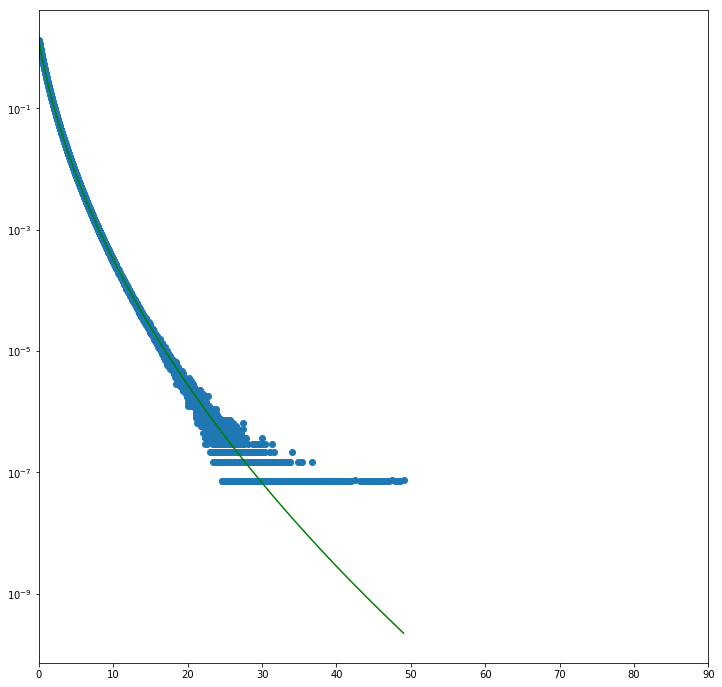

In [59]:
plt.figure(figsize=(12, 12))
plt.scatter(x_, y_)
plt.plot(x_[l_cut:], pdf_calc_np(x_[l_cut:], ao, bo, co), c="g")
#plt.xscale("log")
plt.yscale("log")
plt.xlim(0.001, 90)
#plt.ylim(0.00000001, 3)

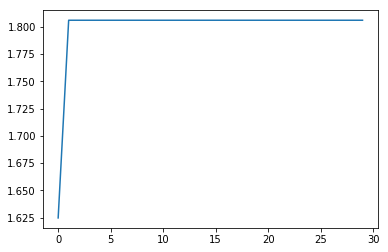

In [47]:
plt.plot(pdf_calc_np(ao, bo, co, x_[l_cut:]))

In [213]:
ao, bo, co

(5.096253, 2.681794, -0.150744)

In [328]:
with open("/home/alex/TP/hse_data/abc2.pkl", "wb") as f:
    pkl.dump((x_[l_cut:], pdf_calc_np(x_[l_cut:], ao, bo, co), ao, bo, co), f)

In [214]:
# write fitted data to file

pathtxt = "/home/alex/TP/hse_data/"
# write N data
with open(os.path.join(pathtxt, "fit_36864.txt"), "w") as f:
    for k in range(len(x_)):
        f.write(str(x_[k]) + " " + str(pdf_calc_np(x_[k], ao, bo, co)) + "\n")

In [61]:
ans_dict["format"] = ["a", "b", "c"]
ans_dict

{28: {0: [4.754947, 2.6319282, -0.14074588],
  1: [4.707027, 2.660154, -0.118589066],
  2: [4.4045386, 2.6664014, -0.07771805],
  3: [4.0849156, 2.6657608, -0.04028634],
  4: [3.9873078, 2.6952834, -0.019603243]},
 56: {0: [41.35423, 3.312253, -1.1305538],
  1: [38.78567, 3.306698, -1.084878],
  2: [41.09389, 3.3482416, -1.0859306],
  3: [35.007362, 3.336918, -0.97272515],
  4: [28.950443, 3.3395483, -0.82753813]},
 84: {0: [182.43275, 3.6725721, -1.9185368],
  1: [176.7338, 3.7043388, -1.8420062],
  2: [169.21957, 3.7456899, -1.7483298],
  3: [155.20262, 3.7832186, -1.6305416],
  4: [127.25339, 3.8102508, -1.4429706]},
 'format': ['a', 'b', 'c']}

In [62]:
with open("/home/alex/TP/hse_data/coeffs.pkl", "wb") as f:
    pkl.dump(ans_dict, f)